In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       file_path = os.path.join(dirname, filename)
       print(file_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-bullying-dataset/data.csv


In [2]:
df = pd.read_csv(file_path)
df.head(5)

,Timestamp,Email Address,What's Your Age?,What do you consider as Cyber bullying?,What Age group of people are most Vulnerable to Cyber bullying,Have you ever been cyber bullied?,"If Yes , What was the way you dealt with the same",What do you think made you the victim of cyber bullying?,What Platform according to you leads in cyber bullying,What type of people are usually the bullies on the internet?,Have You ever knowingly / Unknowingly bullied someone on the internet?,What lead you to bully someone ? ( if yes ),What kind of people are usually the victims of cyber-bullying?,What are the causes of cyber bullying according to you,"What has more impact on an individual , Cyber Bullying or Bullying in real life ?",Who are bullies usually?,Youtube Roasting is a form of bullying. Do you agree ?,"Your opinion on the dank communities on the internet , usually involved in bullying?"
0,1/22/2022 11:39:31,armadhav2007@gmail.com,15 - 18,"Hacking / Phishing your private details, Spamm...",19-30,No,NaN,NaN,Whatsapp / Email,for money,No,NaN,All of above,Lack of awareness,Cyber Bullying,Can be both,No,-
1,1/22/2022 11:40:39,nikhilkumar38674@gmail.com,Above 18,"Hacking / Phishing your private details, Spamm...",equally vulnerable,No,NaN,NaN,Discord,computer friendly,Yes,privacy leak,People with Distinctive Physical appearance,Lack of awareness,equal impact,Can be both,Yes,no
2,1/22/2022 11:41:15,guptasayyam7@gmail.com,15 - 18,"Spamming , Unlawfully morphing your images, Me...",15 - 18,Yes,Blocked / Reported The Bully,idk\n,Discord,anyone can get cyber bullied,No,NaN,All of above,Lack of awareness,equal impact,Can be both,No,goverment should take a action
3,1/22/2022 11:41:57,sonaissuhani@gmail.com,15 - 18,"Mean/Inappropriate Comments, Pranks Calls by s...",15 - 18,Yes,"I was scared to do anything, Blocked / Reporte...",my immatureness,Instagram,people who are just useless and dont have anyt...,Yes,revenge to my bully,All of above,Lack of awareness,Cyber Bullying,A stranger,Yes,"According to my opinion, not everyone likes ge..."
4,1/22/2022 11:42:02,madmaxhu69@gmail.com,15 - 18,"Mean/Inappropriate Comments, Spamming , Unlawf...",Below 15,No,"Aaj mere paas bangla 🏢 hai, gadi hai 🚗, bank-b...",Kanta 🪡 Laga 🤧 Ooi 🥴 Maa 😫\nOoi 🥴Maa😫 Ooi 🥴Maa...,Hum💪🏻 tum mein😖 itne ched karenge 🙀👌🏻 ... ki c...,The one who ain't get attention irl and online,Yes,Are mozzer hu bhay,Influencers / Famous People,Sadism,Bullying in real life,Can be both,No,Ye gajar 🥕 hai 😮 lagta hai 🤔 abhi khanka 🍗 hai...


In [3]:
#Data Cleaning
#filtering the columns to remove irrelaevant user comments
#columns_to_filter
columns_to_filter = ["What do you think made you the victim of cyber bullying?","What Platform according to you leads in cyber bullying",
                    "Your opinion on the dank communities on  the internet , usually involved in bullying?",
                    "If Yes , What was the way you dealt with the same",]
import re
def remove_irrelevant_comments(text):
    pattern = r'^[a-zA-Z0-9\s/,-]+$'
    text = str(text).lower()
    text = text if re.match(pattern,text) and text != "nan" else ""
    return text


for col in columns_to_filter:
    df[col] = df[col].apply(remove_irrelevant_comments)   

In [4]:
#standadrinzing missing values
df.replace("",None,inplace=True)
df.replace("nan",None,inplace=True)

In [5]:
df.isna().sum()

Timestamp                                                                                 0
Email Address                                                                             0
What's Your Age?                                                                          0
What do you consider as Cyber bullying?                                                   1
What Age group of people are most Vulnerable to Cyber bullying                            0
Have you ever been cyber bullied?                                                         0
If Yes , What was the way you dealt with the same                                        41
What do you think made you the victim of cyber bullying?                                 49
What Platform according to you leads in cyber bullying                                    3
What type of people are usually the bullies on the internet?                             14
Have You ever knowingly / Unknowingly bullied someone on the internet?          

1. Timestamp and Email doesn't matter
2. Need to simplify column names
3. 53/68 values are missing in "What lead you to bully someone ? ( if yes )". So we can remove it
4. need to handle missing values for "What type of people are usually the bullies on the internet?" and "What do you consider as Cyber bullying?"

In [6]:
df.drop(['Timestamp', 'Email Address', 'What lead you to bully someone ? ( if yes )',
         'What do you think made you the victim of cyber bullying?',
         'What lead you to bully someone ? ( if yes )',
        'If Yes , What was the way you dealt with the same',
        'Your opinion on the dank communities on  the internet , usually involved in bullying?'],inplace=True,axis=1)

In [7]:
new_column_name_maps = {"What's Your Age?":"age_group",
                        "What do you consider as Cyber bullying?":"cyber_bullying_forms",
                       "What Age group of people are most Vulnerable to Cyber bullying": "vulnerable_age_group",
                       "Have you ever been cyber bullied?":"is_person_cyber_bullied",
                       "What Platform according to you leads in cyber bullying":"platforms",
                       "What type of people are usually the bullies on the internet?":"bullies",
                       "Have You ever knowingly / Unknowingly bullied someone on the internet?":"is_a_bully",
                       "What kind of people are usually the victims of cyber-bullying?":"victims",
                       'What are the causes of cyber bullying according to you':"identified_causes",
                       "What has more impact on an individual , Cyber Bullying or Bullying in real life ?":"cyber_or_real_life_bully",
                       "Who are bullies usually?":"bully_groups",
                       "Youtube Roasting is a form of bullying. Do you agree ?":"youtube_bully_opinion"}
                       

df.rename(columns = new_column_name_maps,inplace=True)


In [8]:
df.fillna("Unknown",inplace=True)

In [9]:
cyber_bullying_forms = []
def get_cyber_bullying_forms(value):
    list_of_bullies = value.split(",")
    cyber_bullying_forms.extend(list_of_bullies)
    return list_of_bullies
    
#identifying all forms of cyber bully
df["cyber_bullying_forms"] = df["cyber_bullying_forms"].apply(get_cyber_bullying_forms)


In [10]:
from collections import Counter
bullies_freq = dict(Counter(cyber_bullying_forms))

In [11]:
bullie_form_df = pd.DataFrame({"Forms of Bullies" : bullies_freq.keys(),"Count": bullies_freq.values()})

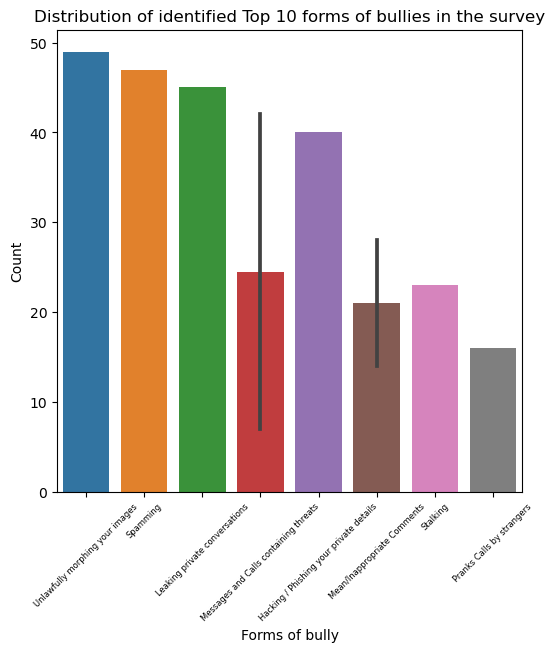

In [12]:
bullie_form_df.sort_values(by='Count',ascending=False,inplace=True)
bullie_form_df["Forms of Bullies"] = bullie_form_df["Forms of Bullies"].apply(lambda x: x.strip())

plt.figure(figsize=(6,6))
sns.barplot(x=bullie_form_df.loc[:10, "Forms of Bullies"],y=bullie_form_df.loc[:10,"Count"])
# Adding labels and title

plt.xlabel('Forms of bully')
plt.ylabel('Count')
plt.title('Distribution of identified Top 10 forms of bullies in the survey')

# Rotating the x-axis labels for better readability (optional)
plt.xticks(rotation=45,fontsize=6)
# Displaying the plot
plt.show()

In [13]:
df.head(3)

,age_group,cyber_bullying_forms,vulnerable_age_group,is_person_cyber_bullied,platforms,bullies,is_a_bully,victims,identified_causes,cyber_or_real_life_bully,bully_groups,youtube_bully_opinion
0,15 - 18,"[Hacking / Phishing your private details, Spa...",19-30,No,whatsapp / email,for money,No,All of above,Lack of awareness,Cyber Bullying,Can be both,No
1,Above 18,"[Hacking / Phishing your private details, Spa...",equally vulnerable,No,discord,computer friendly,Yes,People with Distinctive Physical appearance,Lack of awareness,equal impact,Can be both,Yes
2,15 - 18,"[Spamming , Unlawfully morphing your images, ...",15 - 18,Yes,discord,anyone can get cyber bullied,No,All of above,Lack of awareness,equal impact,Can be both,No


In [14]:
#Some columns are clearly categorical
categorical_columns = ["age_group","platforms","victims","identified_causes","cyber_or_real_life_bully","bully_groups","is_a_bully","is_person_cyber_bullied","youtube_bully_opinion"]

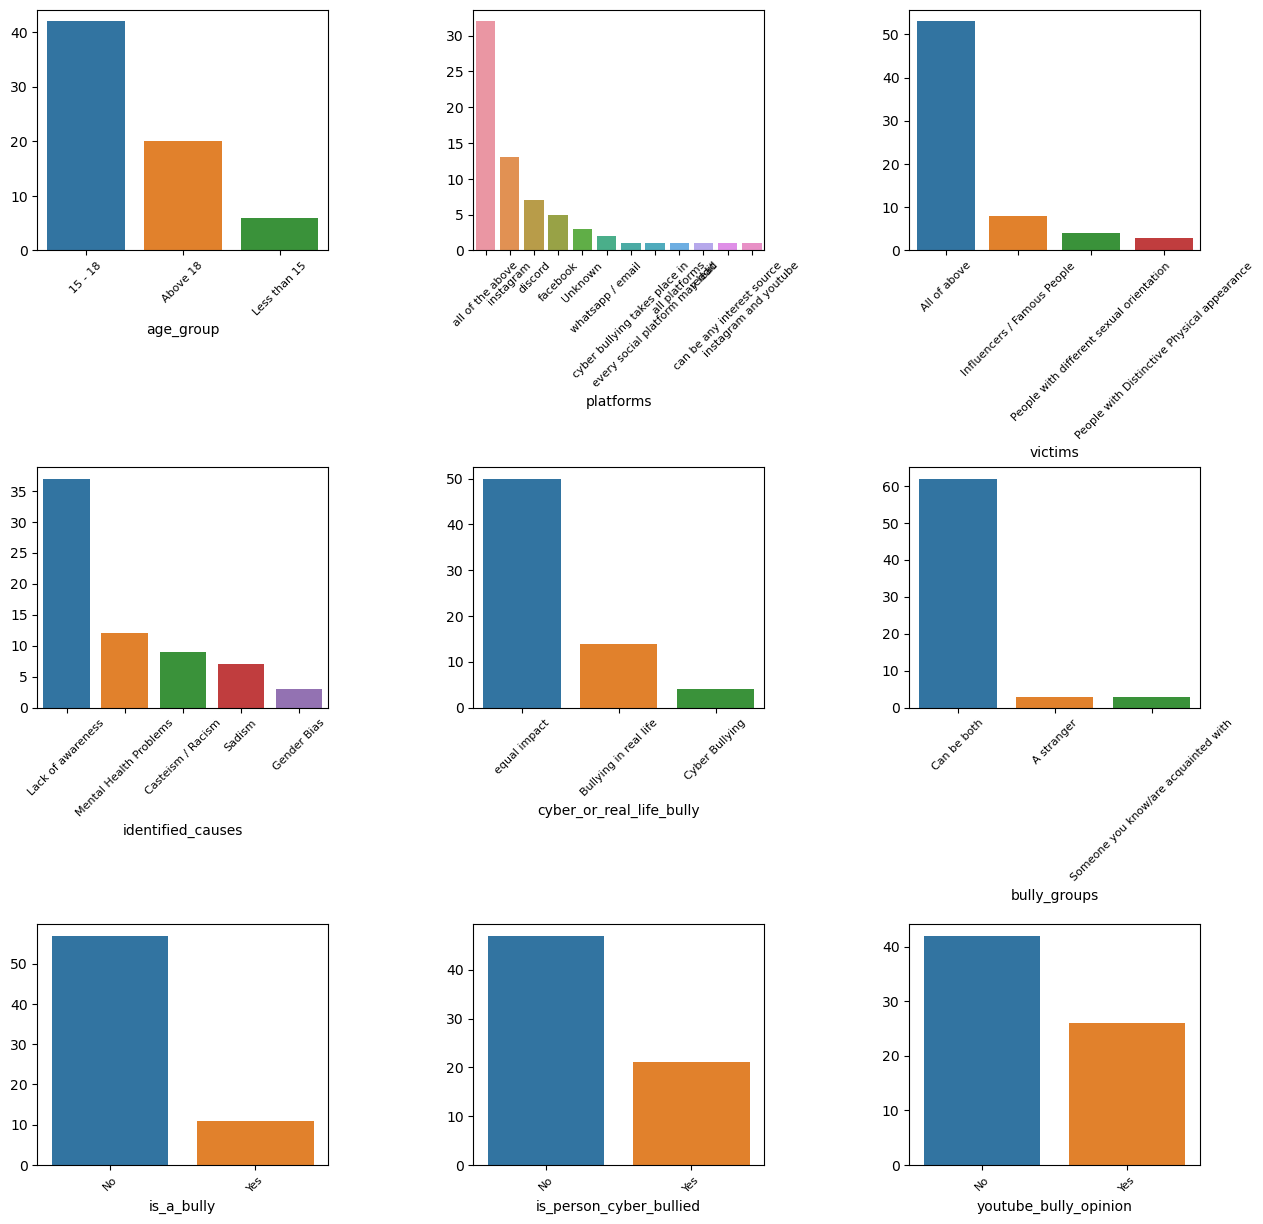

In [15]:
fig, axs = plt.subplots(3,3,figsize=(15,15))
plt.subplots_adjust(wspace=0.5,hspace=0.9)
for i, col in enumerate(categorical_columns):
    col_freq_order = df[col].value_counts().sort_values(ascending=False).index
    sns.countplot(x=col,data=df,order=col_freq_order,ax=axs[int(i/3),int(i%3)]).set_ylabel("")
    
for ax in axs.flat:
    x_ticks = [(each.get_text()) if len(str(each).split(" ")) < 5  else " ".join(each.get_text().split(" ")[:5]) for each in ax.get_xticklabels()]
    ax.set_xticklabels(x_ticks, rotation=45,fontsize=8)
plt.show()


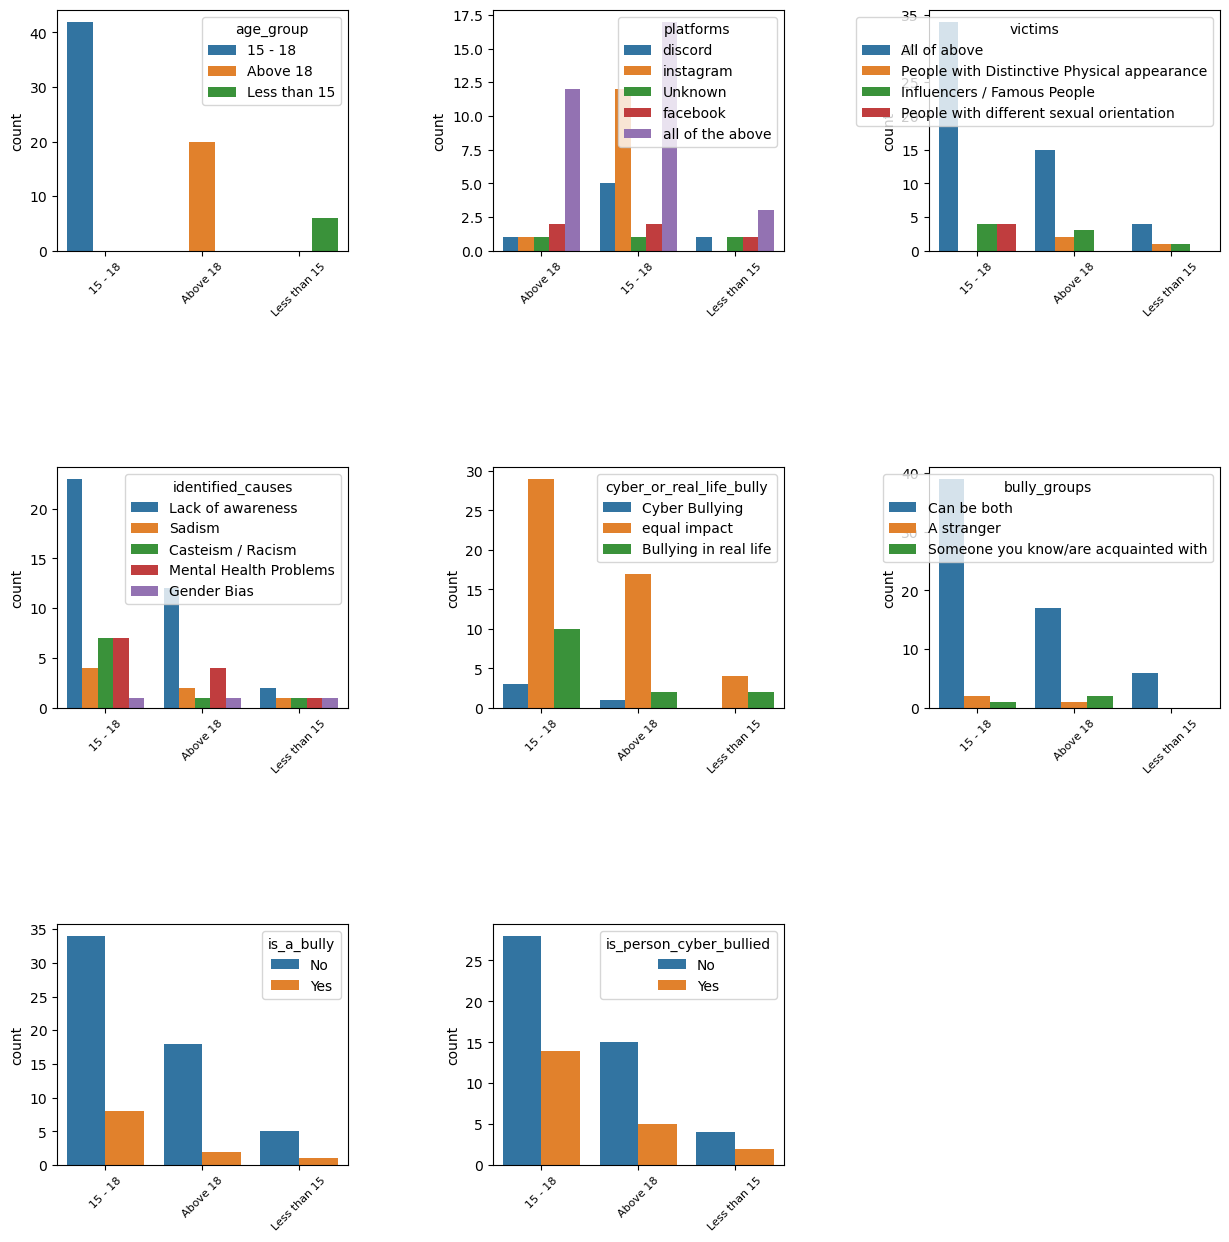

In [16]:
#questionnaires = categorical_columns.remove("age_group")
fig, axs = plt.subplots(3,3,figsize=(15,15))
plt.subplots_adjust(wspace=0.5,hspace=0.9)

for i, col in enumerate(categorical_columns):
    select_category = df[col].value_counts().sort_values(ascending=False).index
    select_category = select_category[:5]
    filtered_df = df[df[col].isin(select_category)]
    sns.countplot(x="age_group",data=filtered_df,hue=col,ax=axs[int(i/3),int(i%3)]).set_xlabel("")
    
for ax in axs.flat:
    x_ticks = [(each.get_text()) if len(str(each).split(" ")) < 5  else " ".join(each.get_text().split(" ")[:5]) for each in ax.get_xticklabels()]
    ax.set_xticklabels(x_ticks, rotation=45,fontsize=8)
fig.delaxes(axs[2, 2])
plt.show()